In [1]:
import json
import re

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import venn

In [2]:
def visualize_accuracies(df):
    df[['acc@1', 'acc@2', 'acc@3']].plot(kind='hist', alpha=0.5, bins=30)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Distribution of acc@1, acc@2, acc@3')
    plt.legend(['acc@1', 'acc@2', 'acc@3'])
    plt.show()

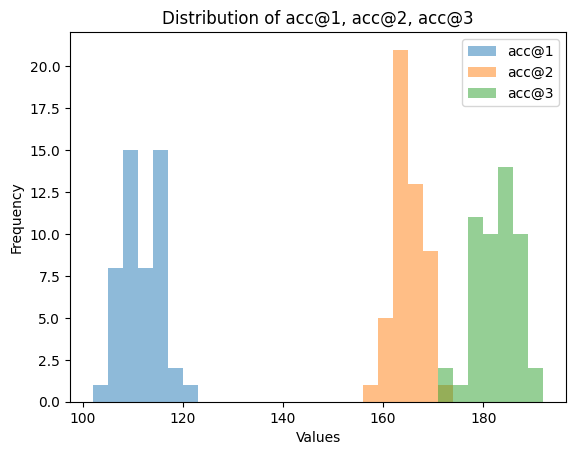

In [3]:
visualize_accuracies(pd.read_csv('../sampled_fl_results/d4j_llama3_stability_R15_N50.csv'))

In [4]:
pd.read_csv('../sampled_fl_results/d4j_llama3_stability_R15_N50.csv')['acc@1'].describe()

count     50.000000
mean     111.340000
std        3.910269
min      102.000000
25%      108.000000
50%      111.000000
75%      114.750000
max      122.000000
Name: acc@1, dtype: float64

In [5]:
pd.read_csv('../sampled_fl_results/d4j_llama3_stability_R5_N50.csv')['acc@1'].describe()

count     50.000000
mean     102.180000
std        5.826365
min       88.000000
25%       97.500000
50%      102.000000
75%      105.000000
max      114.000000
Name: acc@1, dtype: float64

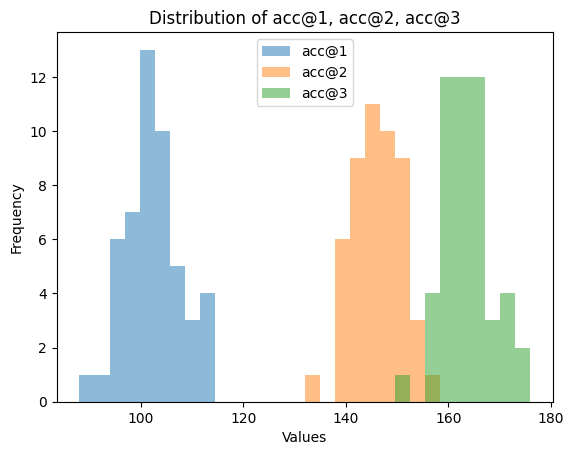

In [6]:
visualize_accuracies(pd.read_csv('../sampled_fl_results/d4j_llama3_stability_R5_N50.csv'))

In [10]:
def read_combined_fl_result(path,k=1):
    with open(path) as f:
        result = json.load(f)
    buggy_methods = result['buggy_methods']
    ranked_at_k = set() 
    for bug, methods in buggy_methods.items():
        if not methods:
            continue

        for rank in methods.values():
            if rank['autofl_rank'] <= k:
                ranked_at_k.add(bug)
                break
    
    return ranked_at_k

/Users/hyunjoon/anaconda3/envs/openllms/lib/python3.9/site-packages/venn/_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((
/Users/hyunjoon/anaconda3/envs/openllms/lib/python3.9/site-packages/venn/_backwards_compatibility.py:30: UserWarning: `venn5()` is retained for backwards compatibility; use `venn()` instead
  warn((


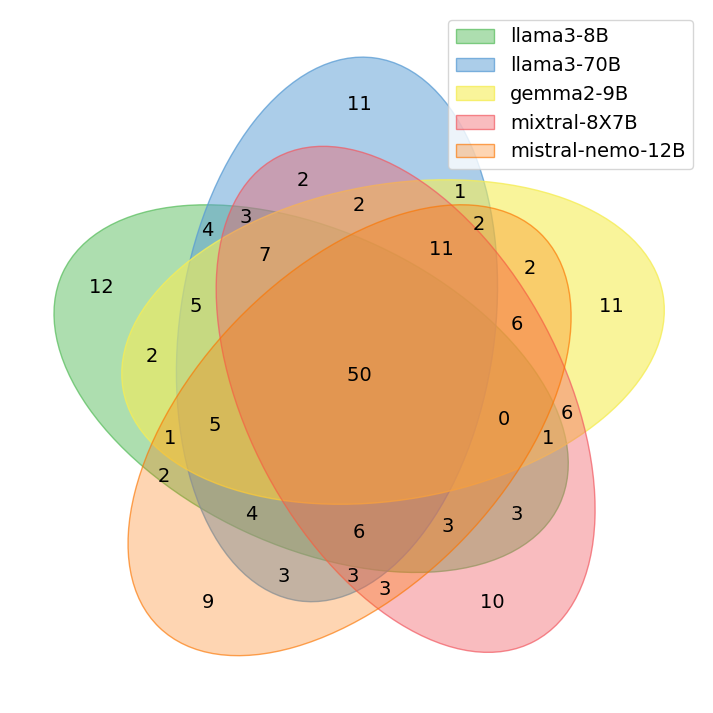

In [12]:
target_paths = [\
    '../combined_fl_results/d4j_llama3_template2.json',\
    '../combined_fl_results/d4j_llama3_70B_template2.json',\
    '../combined_fl_results/d4j_gemma2_template2.json',\
    '../combined_fl_results/d4j_mixtral_template2.json',\
    '../combined_fl_results/d4j_mistral_nemo_template2.json',\
]
target_sets = [read_combined_fl_result(path) for path in target_paths]

labels = venn.get_labels(target_sets, fill=['number'])
venn.venn3(labels, names=['llama3-8B', 'llama3-70B', 'gemma2-9B', 'mixtral-8X7B', 'mistral-nemo-12B'])
plt.show()

/Users/hyunjoon/anaconda3/envs/openllms/lib/python3.9/site-packages/venn/_backwards_compatibility.py:30: UserWarning: `venn3()` is retained for backwards compatibility; use `venn()` instead
  warn((


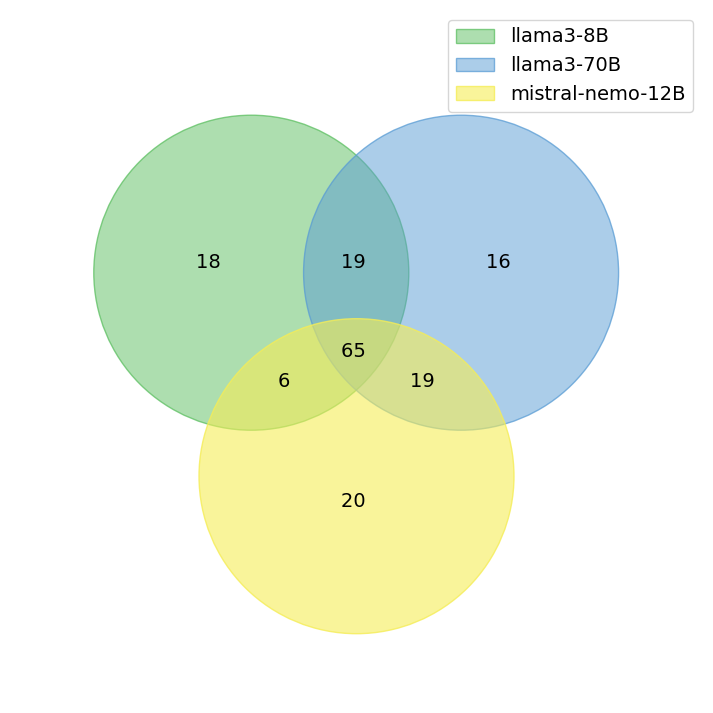

In [13]:
target_paths = [\
    '../combined_fl_results/d4j_llama3_template2.json',\
    '../combined_fl_results/d4j_llama3_70B_template2.json',\
    '../combined_fl_results/d4j_mistral_nemo_template2.json',\
]
target_sets = [read_combined_fl_result(path) for path in target_paths]

labels = venn.get_labels(target_sets, fill=['number'])
venn.venn3(labels, names=['llama3-8B', 'llama3-70B', 'mistral-nemo-12B'])
plt.show()

/Users/hyunjoon/anaconda3/envs/openllms/lib/python3.9/site-packages/venn/_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((
/Users/hyunjoon/anaconda3/envs/openllms/lib/python3.9/site-packages/venn/_backwards_compatibility.py:30: UserWarning: `venn4()` is retained for backwards compatibility; use `venn()` instead
  warn((


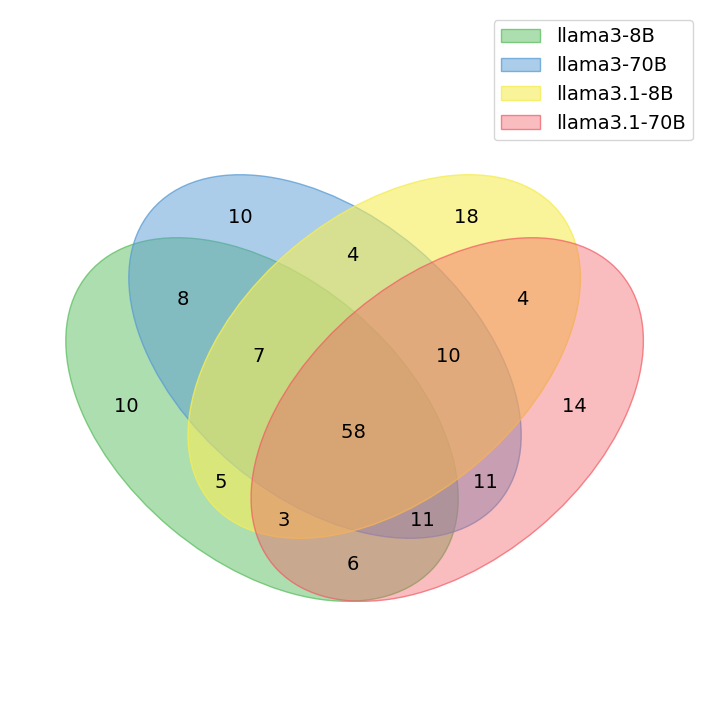

In [30]:
target_paths = [\
    '../combined_fl_results/d4j_llama3_template2.json',\
    '../combined_fl_results/d4j_llama3_70B_template2.json',\
    '../combined_fl_results/d4j_llama3.1_template2_R5.json',\
    '../combined_fl_results/d4j_llama3.1_70B_template2_R5.json',\
]
target_sets = [read_combined_fl_result(path) for path in target_paths]
model_names = ['llama3-8B', 'llama3-70B', 'llama3.1-8B', 'llama3.1-70B']

labels = venn.get_labels(target_sets, fill=['number'])
venn.venn3(labels, names=model_names)
plt.show()

In [35]:
def exclusively_fixed(target_sets, index):
    fixed = target_sets[index].copy()
    for i in range(len(target_sets)):
        if i != index:
            fixed -= target_sets[i]
    return sorted(fixed)

In [36]:
for i, label in enumerate(model_names):
    exclusively_fixed_set = exclusively_fixed(target_sets, i) 
    print(f'{label}: {len(exclusively_fixed_set)}, {exclusively_fixed_set}')
    # TODO: display confidence of each model for that bug / average confidence for bugs ranked at 1

llama3-8B: 10, ['Closure_101', 'Closure_103', 'Closure_54', 'Closure_57', 'Lang_16', 'Lang_43', 'Math_106', 'Math_38', 'Time_19', 'Time_6']
llama3-70B: 10, ['Chart_16', 'Closure_105', 'Closure_116', 'Closure_130', 'Closure_25', 'Closure_53', 'Closure_78', 'Lang_61', 'Math_21', 'Math_39']
llama3.1-8B: 18, ['Chart_5', 'Closure_11', 'Closure_23', 'Closure_34', 'Closure_58', 'Closure_60', 'Closure_68', 'Lang_11', 'Lang_26', 'Lang_3', 'Lang_32', 'Lang_58', 'Lang_7', 'Math_29', 'Math_4', 'Math_56', 'Math_6', 'Math_67']
llama3.1-70B: 14, ['Closure_19', 'Closure_26', 'Closure_3', 'Closure_91', 'Lang_60', 'Math_10', 'Math_16', 'Math_17', 'Math_23', 'Math_25', 'Math_31', 'Math_32', 'Math_71', 'Math_75']


In [8]:
def retrieve_weights(path):
    with open(path, 'r') as file:
        data = file.read()

    pattern = r"Raw Best Weight: \[([^\]]+)\]"
    matches = re.findall(pattern, data)

    return [list(map(float, match.split(','))) for match in matches]

def retrieve_weights_from_json(path):
    with open(path, 'r') as file:
        data = json.load(file)        
    return [data[key]['best'] for key in data.keys() if key.startswith('fold_')]

def visualize_best_weights(weights, model_list):
    weights = np.asarray(weights)
    weights = weights.T / weights.sum(axis=1)
    plt.figure(figsize=(10, 6))

    for i, best_list in enumerate(weights):
        plt.plot(best_list, label=model_list[i])

    plt.xlabel('Iteration')
    plt.ylabel('Best Weight')
    plt.title('Trend of Best Weights Across Folds')
    plt.legend()
    plt.show()

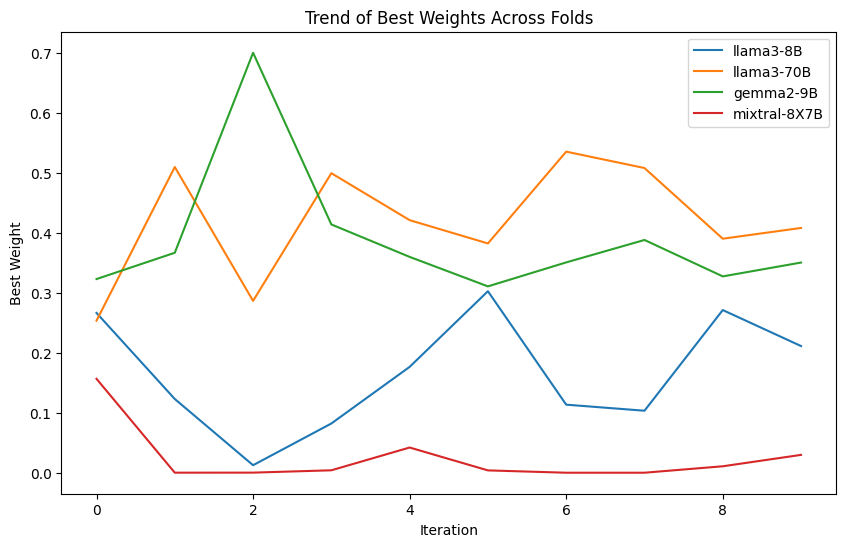

In [9]:
model_list = ['llama3-8B', 'llama3-70B', 'gemma2-9B', 'mixtral-8X7B']
visualize_best_weights(retrieve_weights('../weighted_fl_results/d4j_ensemble4_R5_de_CV.txt'), model_list)

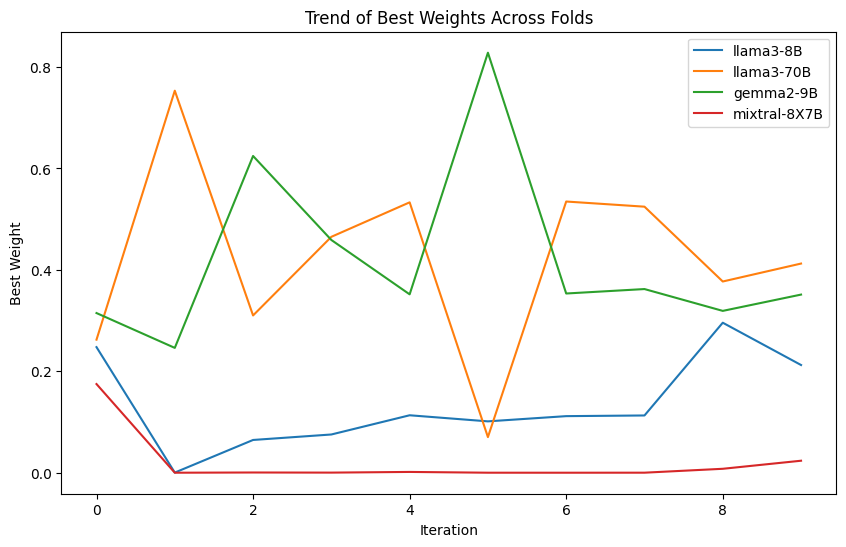

In [10]:
model_list = ['llama3-8B', 'llama3-70B', 'gemma2-9B', 'mixtral-8X7B']
visualize_best_weights(retrieve_weights_from_json('../weighted_fl_results/d4j_ensemble4_R5_de_CV.json'), model_list)

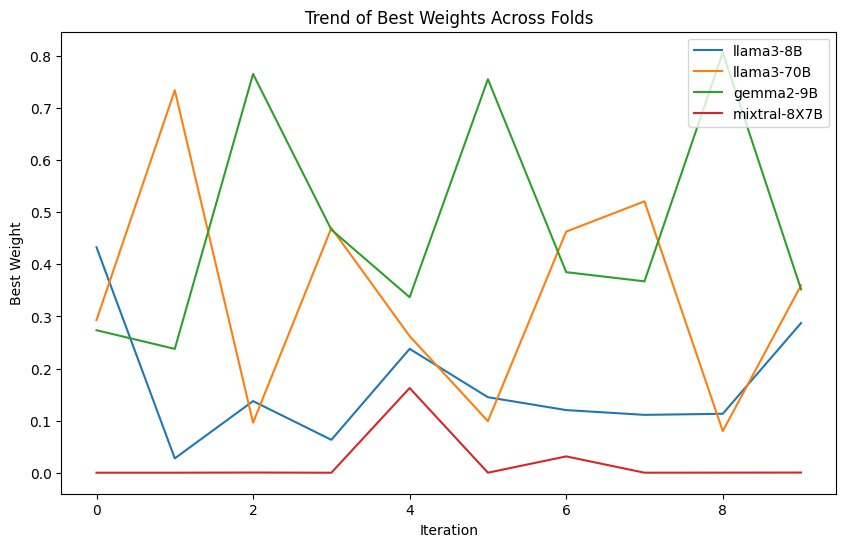

In [11]:
model_list = ['llama3-8B', 'llama3-70B', 'gemma2-9B', 'mixtral-8X7B']
visualize_best_weights(retrieve_weights_from_json('../weighted_fl_results/d4j_ensemble4_R5_pso_CV.json'), model_list)

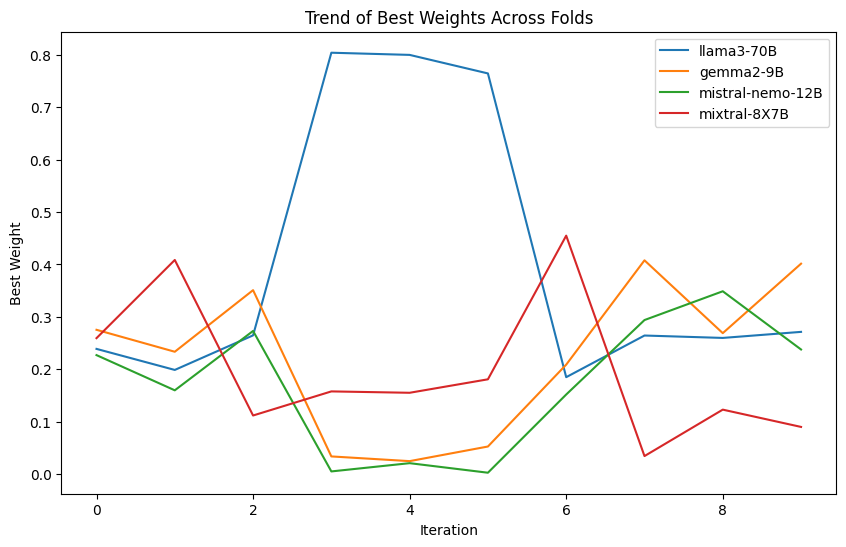

In [57]:
model_list = ['llama3-70B', 'gemma2-9B', 'mistral-nemo-12B', 'mixtral-8X7B']
visualize_best_weights(retrieve_weights('../weighted_fl_results/d4j_ensemble4_2_R5_pso_CV.txt'), model_list)

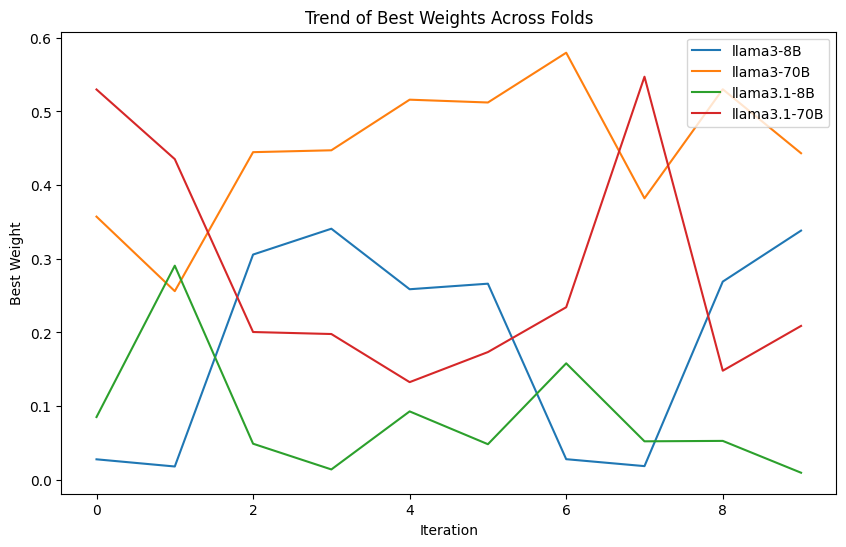

In [58]:
model_list = ['llama3-8B', 'llama3-70B', 'llama3.1-8B', 'llama3.1-70B']
visualize_best_weights(retrieve_weights('../weighted_fl_results/d4j_ensemble4_3_R5_de_CV.txt'), model_list)